In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:
df = pd.read_csv("Food_Delivery_Times.csv")

In [21]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [22]:
df.isna().sum() #calculates null values

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [23]:
#Drop the NaN values
df.dropna(subset=['Weather','Traffic_Level','Time_of_Day','Courier_Experience_yrs'],inplace=True)

df.drop('Order_ID',axis=1,inplace=True) #Drop the Order_Id as it won't contribute in prediction

In [24]:
df.nunique()

Distance_km               710
Weather                     5
Traffic_Level               3
Time_of_Day                 4
Vehicle_Type                3
Preparation_Time_min       25
Courier_Experience_yrs     10
Delivery_Time_min         106
dtype: int64

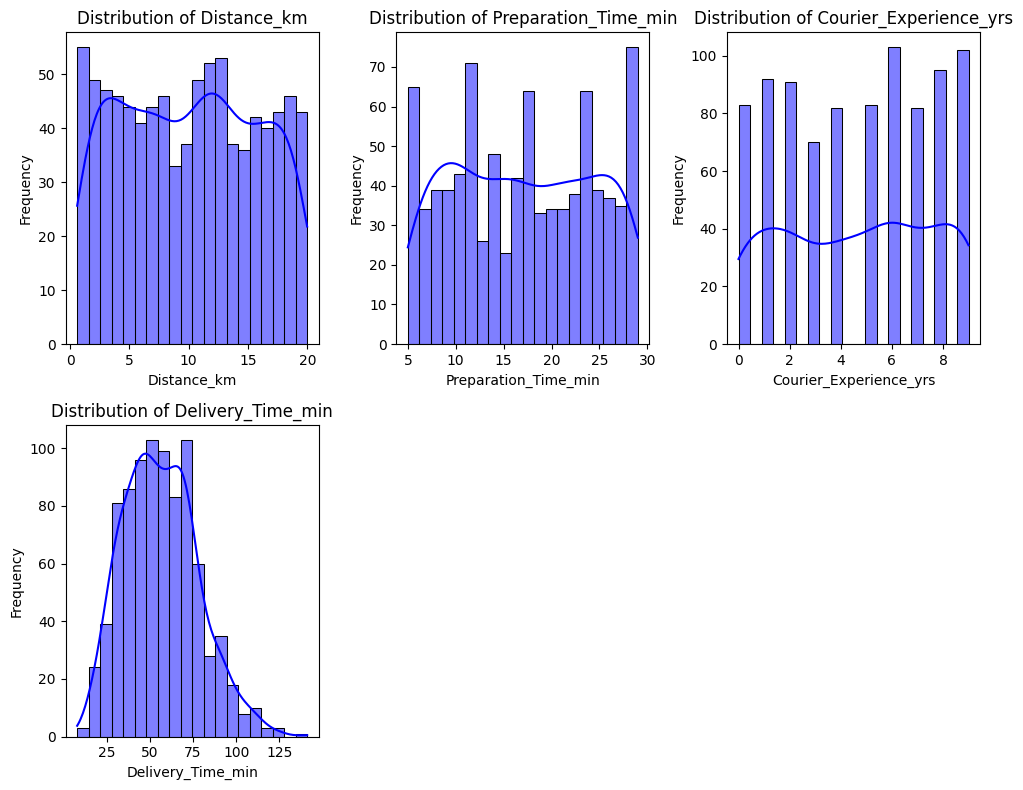

In [25]:
# Create distribution plots
cont = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(10,8))
for i, col in enumerate(cont, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

/var/folders/f7/m4f1jm9j1kn0vg3kh04qdysh0000gn/T/ipykernel_40390/1825003409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Courier_Experience_yrs',y='Delivery_Time_min',palette='plasma')


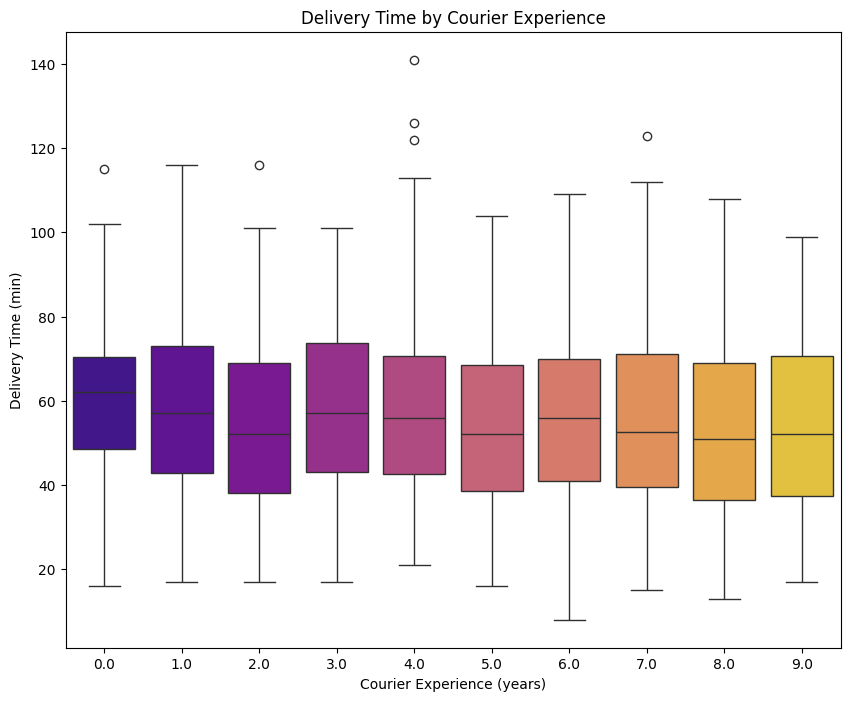

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Courier_Experience_yrs',y='Delivery_Time_min',palette='plasma')
plt.title("Delivery Time by Courier Experience")
plt.xlabel("Courier Experience (years)")
plt.ylabel("Delivery Time (min)")
plt.show()

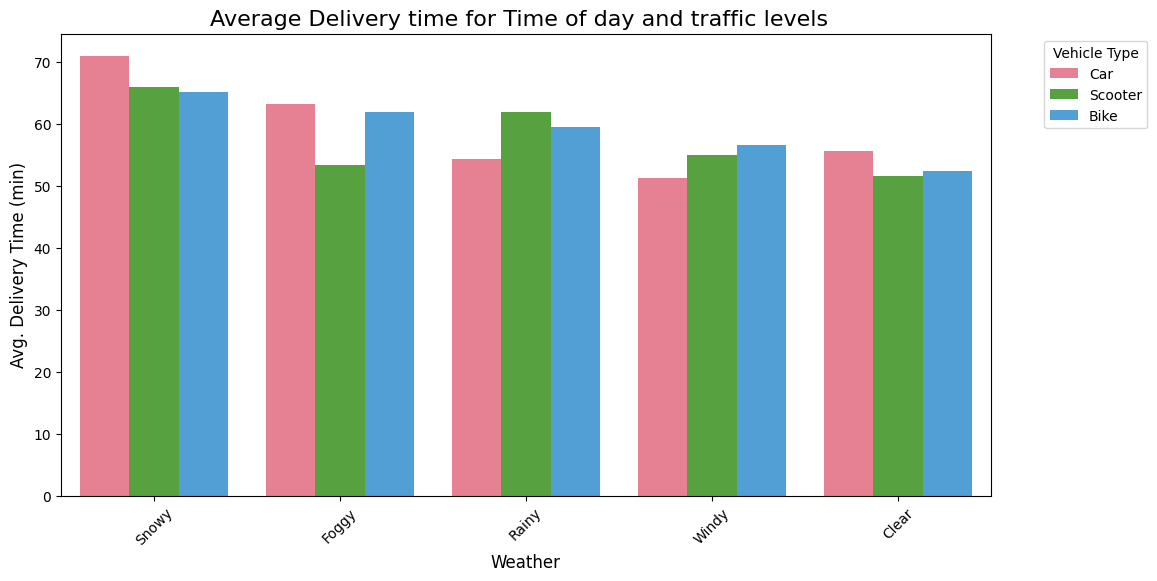

In [23]:
g1=df.groupby(['Weather','Vehicle_Type'])['Delivery_Time_min'].mean().reset_index().sort_values(by='Delivery_Time_min',ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=g1,x='Weather',y='Delivery_Time_min',hue='Vehicle_Type',palette='husl')
ax.set_title('Average Delivery time for Time of day and traffic levels  ', fontsize=16)
ax.set_xlabel('Weather', fontsize=12)
ax.set_ylabel('Avg. Delivery Time (min)', fontsize=12)
ax.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

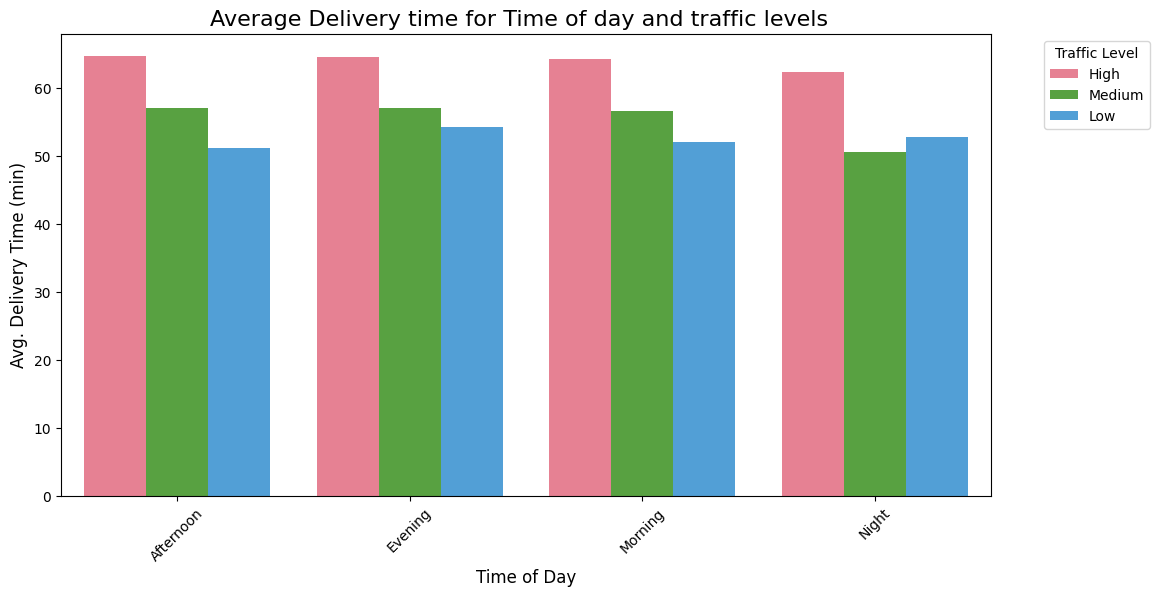

In [24]:
g2=df.groupby(['Traffic_Level','Time_of_Day'])['Delivery_Time_min'].mean().reset_index().sort_values(by='Delivery_Time_min',ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=g2,x='Time_of_Day',y='Delivery_Time_min',hue='Traffic_Level',palette='husl')
ax.set_title('Average Delivery time for Time of day and traffic levels  ', fontsize=16)
ax.set_xlabel('Time of Day', fontsize=12)
ax.set_ylabel('Avg. Delivery Time (min)', fontsize=12)
ax.legend(title='Traffic Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [28]:
cat = df.select_dtypes(include=['object', 'category']).columns
def dummies(df,cols):
    for col in cols:
        dummies = pd.get_dummies(df[col],dtype=int,prefix=col)
        df = pd.concat([df,dummies],axis=1)
        df = df.drop(labels=col, axis=1)
    return df

df = dummies(df,cols=cat)


In [29]:
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,16.42,20,2.0,84,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,9.52,28,1.0,59,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,7.44,5,1.0,37,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4,19.03,16,5.0,68,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [30]:
X = df.drop('Delivery_Time_min',axis=1)
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape)

(706, 18) (177, 18)


In [66]:
print(X_train.head())


   Distance_km  Preparation_Time_min  Courier_Experience_yrs  Weather_Clear  \
0    -0.669657              0.125871               -0.891439       1.049376   
1    -1.075507              0.812618               -0.891439      -0.952947   
2    -0.085586              0.675269                0.814132       1.049376   
3    -1.273138              0.812618               -1.232553      -0.952947   
4    -0.517905             -0.423526                0.814132       1.049376   

   Weather_Foggy  Weather_Rainy  Weather_Snowy  Weather_Windy  \
0      -0.347325      -0.525997      -0.336994       -0.32912   
1      -0.347325       1.901152      -0.336994       -0.32912   
2      -0.347325      -0.525997      -0.336994       -0.32912   
3      -0.347325       1.901152      -0.336994       -0.32912   
4      -0.347325      -0.525997      -0.336994       -0.32912   

   Traffic_Level_High  Traffic_Level_Low  Traffic_Level_Medium  \
0           -0.515008           1.293925             -0.844744   
1 

In [31]:
scalar = StandardScaler()

scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)
X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

In [33]:
import pickle 
pickle.dump(scalar,open('scaling.pkl','wb'))

In [34]:
print(X_train.head())


   Distance_km  Preparation_Time_min  Courier_Experience_yrs  Weather_Clear  \
0    -0.669657              0.125871               -0.891439       1.049376   
1    -1.075507              0.812618               -0.891439      -0.952947   
2    -0.085586              0.675269                0.814132       1.049376   
3    -1.273138              0.812618               -1.232553      -0.952947   
4    -0.517905             -0.423526                0.814132       1.049376   

   Weather_Foggy  Weather_Rainy  Weather_Snowy  Weather_Windy  \
0      -0.347325      -0.525997      -0.336994       -0.32912   
1      -0.347325       1.901152      -0.336994       -0.32912   
2      -0.347325      -0.525997      -0.336994       -0.32912   
3      -0.347325       1.901152      -0.336994       -0.32912   
4      -0.347325      -0.525997      -0.336994       -0.32912   

   Traffic_Level_High  Traffic_Level_Low  Traffic_Level_Medium  \
0           -0.515008           1.293925             -0.844744   
1 

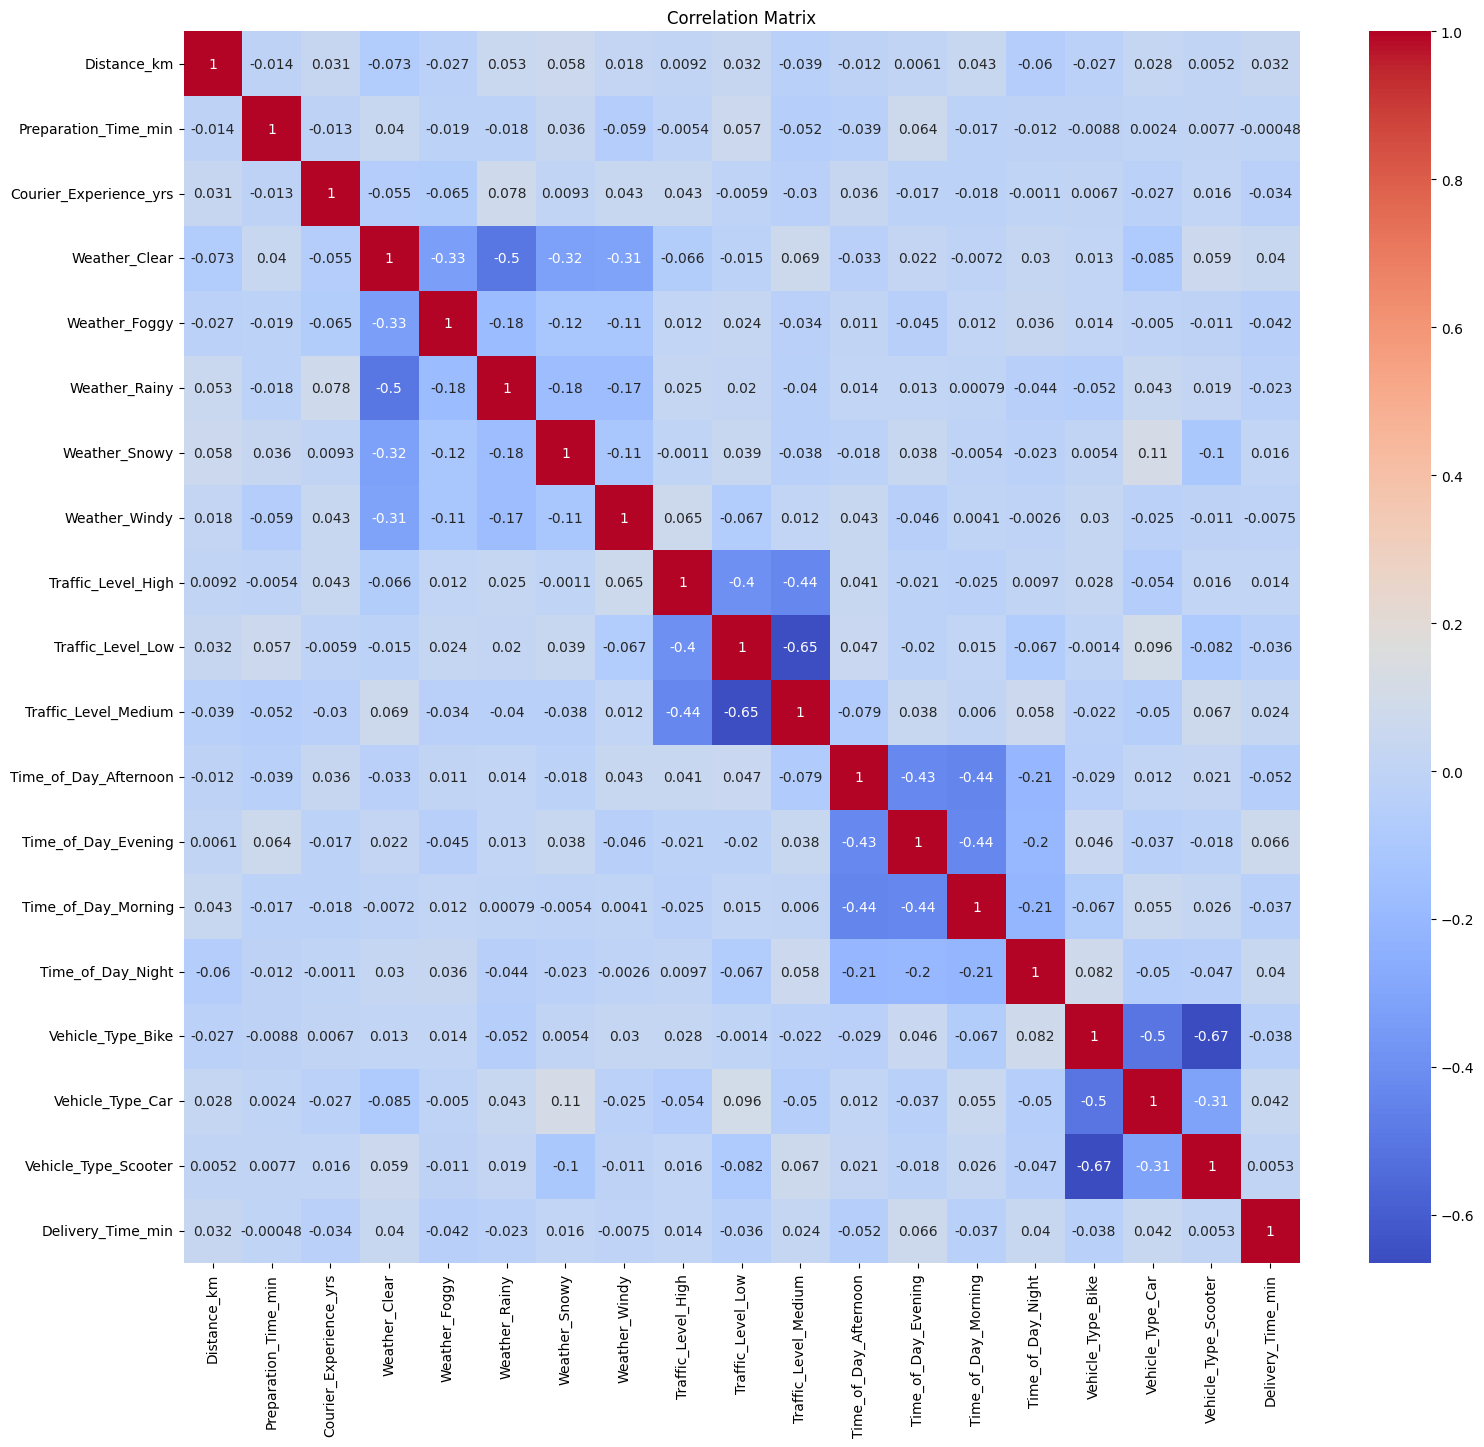

In [71]:
data_copy = pd.concat([X_train,y_train],axis=1)
corr = data_copy.corr()

fig, ax = plt.subplots(figsize=(18,16))
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [35]:
import pickle
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest Regression": RandomForestRegressor(),
        "Decision Tree Regressor": DecisionTreeRegressor(),
        "K-Nearest Neighbours": KNeighborsRegressor()
    }

    result = {}
    best_model = None
    best_score = -float('inf')  # Initialize with a very low value for R2 score

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        result[name] = {"R2_Score": r2 * 100, "MSE": mse}

        # Track the best model based on R2 score
        if r2 > best_score:
            best_score = r2
            best_model = model

    result_frame = pd.DataFrame(result).T

    # Save the best model using pickle
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)

    return result_frame

# Assuming X_train, X_test, y_train, and y_test are already defined
result_frame = evaluate_models(X_train, X_test, y_train, y_test)
print(result_frame)


                           R2_Score         MSE
Linear Regression         83.253146   68.447770
Random Forest Regression  76.448635   96.259176
Decision Tree Regressor   47.196339  215.819209
K-Nearest Neighbours      43.858374  229.462147


In [36]:
pickled_model = pickle.load(open('best_model.pkl','rb'))

In [40]:
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,16.42,20,2.0,84,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,9.52,28,1.0,59,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,7.44,5,1.0,37,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4,19.03,16,5.0,68,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [74]:
import pickle
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to a file using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


In [75]:
# Load the saved model
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# New data (for prediction)
# Make sure the new data has the same features and preprocessing as the training data
# For example:
new_data = pd.DataFrame({
    'Distance_km': [8.5, 15.2, 10.3],
    'Preparation_Time_min': [14, 22, 12],
    'Courier_Experience_yrs': [2, 3, 1],
    'Weather_Clear': [1, 0, 0],
    'Weather_Foggy': [0, 0, 1],
    'Weather_Rainy': [0, 1, 0],
    'Weather_Snowy': [0, 0, 0],
    'Weather_Windy': [0, 0, 1],
    'Traffic_Level_High': [0, 1, 0],
    'Traffic_Level_Low': [1, 0, 1],
    'Traffic_Level_Medium': [0, 0, 0],
    'Time_of_Day_Afternoon': [1, 0, 0],
    'Time_of_Day_Evening': [0, 1, 0],
    'Time_of_Day_Morning': [0, 0, 1],
    'Time_of_Day_Night': [0, 0, 0],
    'Vehicle_Type_Bike': [0, 1, 0],
    'Vehicle_Type_Car': [0, 0, 1],
    'Vehicle_Type_Scooter': [1, 0, 0]
})

# Ensure the new data is scaled using the same scaler used for training
new_data_scaled = scalar.transform(new_data)

# Make predictions on the new data
new_predictions = loaded_model.predict(new_data_scaled)

# Print the predictions
print("Predictions for new data:", new_predictions)


Predictions for new data: [286.96153501 460.88115996 309.22426334]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
